<a href="https://colab.research.google.com/github/JEEVA-JOSLIN/DEEP-LEARNING-ASSIGNMENT/blob/main/DEEP_LEARNING_ASSIGNMENT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
def train_model(model, x_train, y_train, x_test, y_test, batch_size, epochs, learning_rate):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                        validation_data=(x_test, y_test), verbose=1)
    return history

In [ ]:
batch_size = 64
epochs = 10
learning_rate = 0.001

In [ ]:
model = create_model()
history = train_model(model, x_train, y_train, x_test, y_test, batch_size, epochs, learning_rate)


Epoch 1/10
938/938 [==============================] - 51s 53ms/step - loss: 0.1811 - accuracy: 0.9432 - val_loss: 0.0587 - val_accuracy: 0.9829
Epoch 2/10
938/938 [==============================] - 44s 47ms/step - loss: 0.0497 - accuracy: 0.9847 - val_loss: 0.0406 - val_accuracy: 0.9867
Epoch 3/10
938/938 [==============================] - 46s 49ms/step - loss: 0.0355 - accuracy: 0.9886 - val_loss: 0.0351 - val_accuracy: 0.9885
Epoch 4/10
938/938 [==============================] - 45s 48ms/step - loss: 0.0281 - accuracy: 0.9911 - val_loss: 0.0377 - val_accuracy: 0.9880
Epoch 5/10
938/938 [==============================] - 45s 47ms/step - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.0297 - val_accuracy: 0.9911
Epoch 6/10
938/938 [==============================] - 45s 48ms/step - loss: 0.0184 - accuracy: 0.9941 - val_loss: 0.0298 - val_accuracy: 0.9908
Epoch 7/10
938/938 [==============================] - 44s 47ms/step - loss: 0.0138 - accuracy: 0.9957 - val_loss: 0.0293 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 2s 6ms/step - loss: 0.0385 - accuracy: 0.9895
Test accuracy: 0.9894999861717224


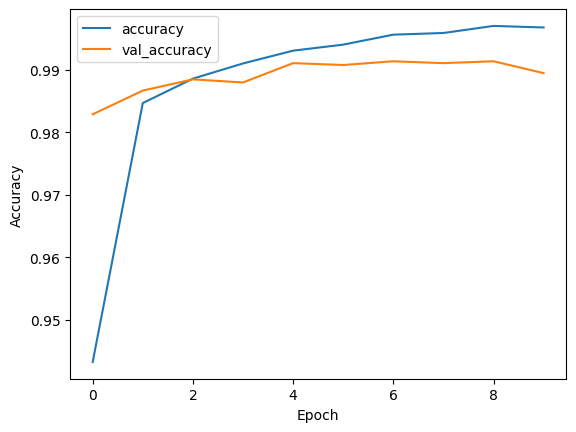

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()